In [1]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('../input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
del train['PassengerId'],train['Name'],train['Ticket'],train['Cabin']

<AxesSubplot:xlabel='Age', ylabel='Density'>

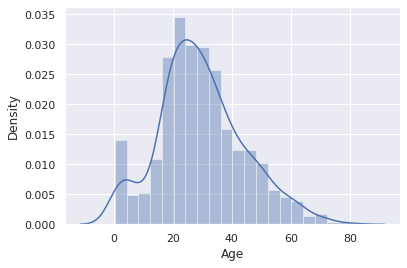

In [4]:
sns.distplot(train.Age)

In [5]:
train.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [6]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
train.Age.fillna(train.Age.mean(),inplace = True)

In [8]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
train.Embarked = train.Embarked.replace(np.NaN,'S')

In [10]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [12]:
train.Sex = train.Sex.map({'male':1,'female':0})

In [13]:
train = pd.get_dummies(train,columns=['Embarked'],drop_first=True)

In [14]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0


In [15]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values


In [16]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
rfc = RandomForestClassifier()


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
grid_params = ({'n_estimators':[100,200,300,400],'criterion':['gini', 'entropy', 'log_loss']})
grid_search = GridSearchCV(estimator=rfc,scoring='accuracy',
             param_grid=grid_params)

In [20]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'criterion': 'entropy', 'n_estimators': 300}

In [21]:
grid_search.score(X_train,y_train)

0.9803370786516854

In [22]:
rfc = RandomForestClassifier(criterion= 'entropy', n_estimators= 400)

In [23]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [24]:
prediction = rfc.predict(X_test)
accuracy_score(prediction,y_test)

0.8212290502793296

In [25]:
cm = confusion_matrix(prediction,y_test)
cm

array([[92, 19],
       [13, 55]])

In [26]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       111
           1       0.74      0.81      0.77        68

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.82      0.82       179



In [27]:
test = pd.read_csv('../input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
del test['Name'],test['Ticket'],test['Cabin']

In [29]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [30]:
test.Age.fillna(test.Age.mean(),inplace = True)

In [31]:
test['Fare'].fillna(test.Fare.mean(),inplace=True)

In [32]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [33]:
test.Sex = test.Sex.map({'male':1,'female':0})

In [34]:
test = pd.get_dummies(test,columns=['Embarked'],drop_first=True)

In [35]:
test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,1,0
1,893,3,0,47.0,1,0,7.0000,0,1


In [36]:
inputs = test.iloc[:,1:].values
inputs = sc.transform(inputs)

In [37]:
final_prediction = rfc.predict(inputs)
final_prediction = pd.DataFrame(final_prediction)
final_prediction.columns=['Survived']
final_prediction

,Survived
0,0
1,0
2,0
3,1
4,0
...,...
413,0
414,1
415,0
416,0


In [38]:
id = pd.DataFrame(test.PassengerId)
id.columns = ['PassengerId']



In [39]:
submission = pd.concat([id,final_prediction],axis=1)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [40]:
submission.to_csv('submission.csv',index=False)